In [1]:
import pandas as pd
import japanize_matplotlib

allergy_data = pd.read_csv('../Data/race_sample.csv')
display(allergy_data.head(10))
allergy_data.shape

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,256086,2001,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.913073,9.185489,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.028063,8.706366,2.0
1,48892,2006,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,1.982204,6.915811,NaN,...,NaN,NaN,NaN,2.499658,NaN,NaN,NaN,6.045175,6.915811,2.0
2,264558,1990,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,10.718686,18.778919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70323,1997,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.216290,16.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,3.824778,12.999316,9.516769,9.516769,1.0
4,31931,2007,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,5.965777,NaN,...,NaN,0.095825,2.01232,5.921971,NaN,3.014374,NaN,2.053388,5.921971,6.0
5,296184,2000,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.580424,12.331280,NaN,...,NaN,NaN,NaN,6.422998,NaN,6.951403,NaN,6.433949,12.936345,24.0
6,301397,2005,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.043806,1.883641,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,272297,1993,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,12.468172,17.976728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,87279,2010,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,3.271732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,276306,1994,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,11.000684,18.781656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(27000, 50)

In [2]:
# アトピックマーチと性別の相関関係

In [3]:
# 性別とアトピックマーチをダミー変数化
at_mar_gen = pd.get_dummies(allergy_data, columns=['GENDER_FACTOR', 'ATOPIC_MARCH_COHORT'], prefix_sep='/')
print(f'at_mar_gen : {at_mar_gen.shape}\n')
at_mar_gen.dtypes

at_mar_gen : (27000, 52)



SUBJECT_ID                     int64
BIRTH_YEAR                     int64
RACE_FACTOR                   object
ETHNICITY_FACTOR              object
PAYER_FACTOR                  object
AGE_START_YEARS              float64
AGE_END_YEARS                float64
SHELLFISH_ALG_START          float64
SHELLFISH_ALG_END            float64
FISH_ALG_START               float64
FISH_ALG_END                 float64
MILK_ALG_START               float64
MILK_ALG_END                 float64
SOY_ALG_START                float64
SOY_ALG_END                  float64
EGG_ALG_START                float64
EGG_ALG_END                  float64
WHEAT_ALG_START              float64
WHEAT_ALG_END                float64
PEANUT_ALG_START             float64
PEANUT_ALG_END               float64
SESAME_ALG_START             float64
SESAME_ALG_END               float64
TREENUT_ALG_START            float64
TREENUT_ALG_END              float64
WALNUT_ALG_START             float64
WALNUT_ALG_END               float64
P

In [4]:
# 見やすい様にカラムの順序を変更する
at_mar_gen = at_mar_gen.rename(columns={"GENDER_FACTOR/S0 - Male": "Male", 'GENDER_FACTOR/S1 - Female':'Female',
                                       "ATOPIC_MARCH_COHORT/False": "該当なし", 'ATOPIC_MARCH_COHORT/True':'Atopic_march'})
at_mar_gen = at_mar_gen.reindex(columns=['Male','Female','該当なし','Atopic_march'])

In [5]:
# 年代と発生場所の相関性を見る
at_mar_gen_corr = at_mar_gen.corr()
at_mar_gen_corr

,Male,Female,該当なし,Atopic_march
Male,1.000000,-1.000000,-0.009918,0.009918
Female,-1.000000,1.000000,0.009918,-0.009918
該当なし,-0.009918,0.009918,1.000000,-1.000000
Atopic_march,0.009918,-0.009918,-1.000000,1.000000


In [6]:
# 見やすい様にカラムの順序を変更する
at_mar_gen_corr = at_mar_gen_corr.reindex(columns=['Male','Female'],index=['該当なし', 'Atopic_march'])

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# 文字化けするので、フォントを指定
sns.set_theme(font_scale=1, font='IPAexGothic')

<Axes: >

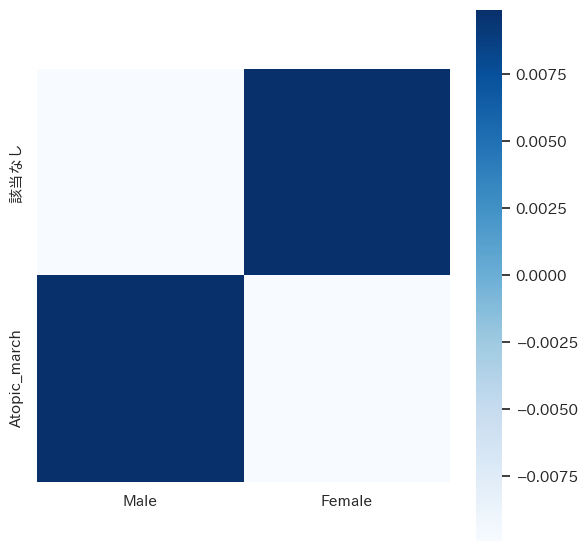

In [8]:
# カラム量が多いため、サイズを見やすく調整
fig, ax = plt.subplots(figsize=(6, 6)) 

# ヒートマップで可視化
plt.tight_layout()
sns.heatmap(at_mar_gen_corr, cmap="Blues", square=True)

In [9]:
# 人種と性別の割合

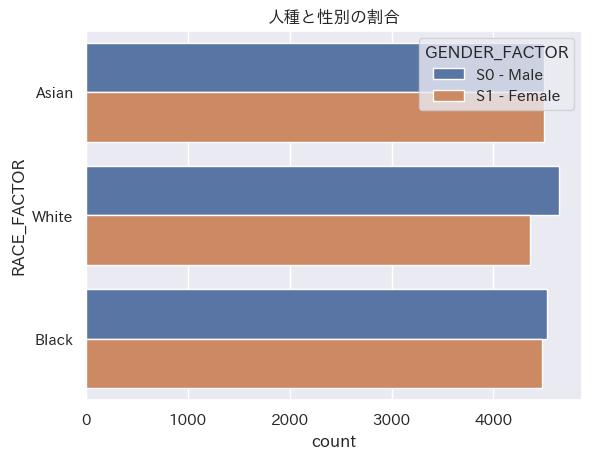

In [10]:
# 男女の比率
sns.countplot(y=allergy_data['RACE_FACTOR'], hue=allergy_data['GENDER_FACTOR'],hue_order = ['S0 - Male', 'S1 - Female'],
              order=allergy_data['RACE_FACTOR'].value_counts().index).set_title("人種と性別の割合")
results_path = '../Graphs/race_gender_gap.png'
# plt.savefig(results_path, bbox_inches='tight')

In [11]:
# 分析結果
# 白人で男性がややアトピックマーチが多い

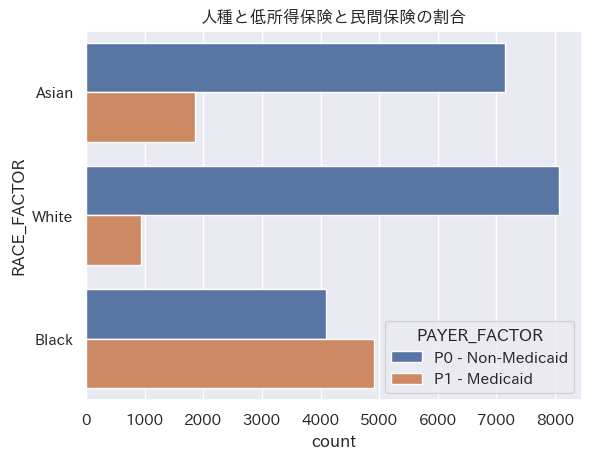

In [12]:
# 人種と低所得者保険と民間保険との割合
sns.countplot(y=allergy_data['RACE_FACTOR'], hue=allergy_data['PAYER_FACTOR'],
              order=allergy_data['RACE_FACTOR'].value_counts().index).set_title("人種と低所得保険と民間保険の割合")
results_path = '../Graphs/race_medicaid_gap.png'
# plt.savefig(results_path, bbox_inches='tight')

In [13]:
# 分析結果
# 低所得者保険がアレルギーに影響していると言うより、アメリカでの人種間での所得層の割合がそのまま反映されている可能性あり。

In [14]:
# アトピーとアレルギー性鼻炎、喘息の人種割合
allergy_data.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [15]:
# 疾患の状態を保持の有無のみにする
allergy_data['ATOPIC_DERM_START'] = allergy_data['ATOPIC_DERM_START'].notna()
allergy_data['ALLERGIC_RHINITIS_START'] = allergy_data['ALLERGIC_RHINITIS_START'].notna()
allergy_data['ASTHMA_START'] = allergy_data['ASTHMA_START'].notna()
display(allergy_data.head(10))

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,256086,2001,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.913073,9.185489,NaN,...,NaN,False,NaN,False,NaN,False,NaN,7.028063,8.706366,2.0
1,48892,2006,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,1.982204,6.915811,NaN,...,NaN,False,NaN,True,NaN,False,NaN,6.045175,6.915811,2.0
2,264558,1990,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,10.718686,18.778919,NaN,...,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN
3,70323,1997,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.216290,16.000000,NaN,...,NaN,False,NaN,False,NaN,True,12.999316,9.516769,9.516769,1.0
4,31931,2007,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,5.965777,NaN,...,NaN,True,2.01232,True,NaN,True,NaN,2.053388,5.921971,6.0
5,296184,2000,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.580424,12.331280,NaN,...,NaN,False,NaN,True,NaN,True,NaN,6.433949,12.936345,24.0
6,301397,2005,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.043806,1.883641,NaN,...,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN
7,272297,1993,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,12.468172,17.976728,NaN,...,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN
8,87279,2010,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,3.271732,NaN,...,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN
9,276306,1994,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,11.000684,18.781656,NaN,...,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN


In [16]:
# それぞれの疾患の保持者者のみを抽出
Atopic = allergy_data[allergy_data['ATOPIC_DERM_START'] == True]
Rhinitis = allergy_data[allergy_data['ALLERGIC_RHINITIS_START'] == True]
Athma = allergy_data[allergy_data['ASTHMA_START'] == True]
display(Rhinitis.head(10))

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
1,48892,2006,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,1.982204,6.915811,NaN,...,NaN,False,NaN,True,NaN,False,NaN,6.045175,6.915811,2.0
4,31931,2007,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,5.965777,NaN,...,NaN,True,2.012320,True,NaN,True,NaN,2.053388,5.921971,6.0
5,296184,2000,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.580424,12.331280,NaN,...,NaN,False,NaN,True,NaN,True,NaN,6.433949,12.936345,24.0
13,235280,2000,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,3.151266,13.034908,NaN,...,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN,NaN
20,110543,2009,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.231348,4.610541,NaN,...,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN,NaN
38,170701,1999,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.420260,14.776181,NaN,...,NaN,False,NaN,True,10.275154,True,11.619439,7.000684,9.032170,3.0
47,228907,2001,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,1.648186,12.429843,NaN,...,NaN,False,NaN,True,8.290212,True,NaN,5.642710,12.147844,13.0
55,324503,2006,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,6.480493,NaN,...,NaN,True,0.553046,True,5.905544,False,NaN,NaN,NaN,NaN
57,275426,1996,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,8.128679,17.127995,NaN,...,NaN,False,NaN,True,17.032170,False,NaN,9.538672,17.032170,5.0
69,238536,2003,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.080767,10.466804,NaN,...,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN,NaN


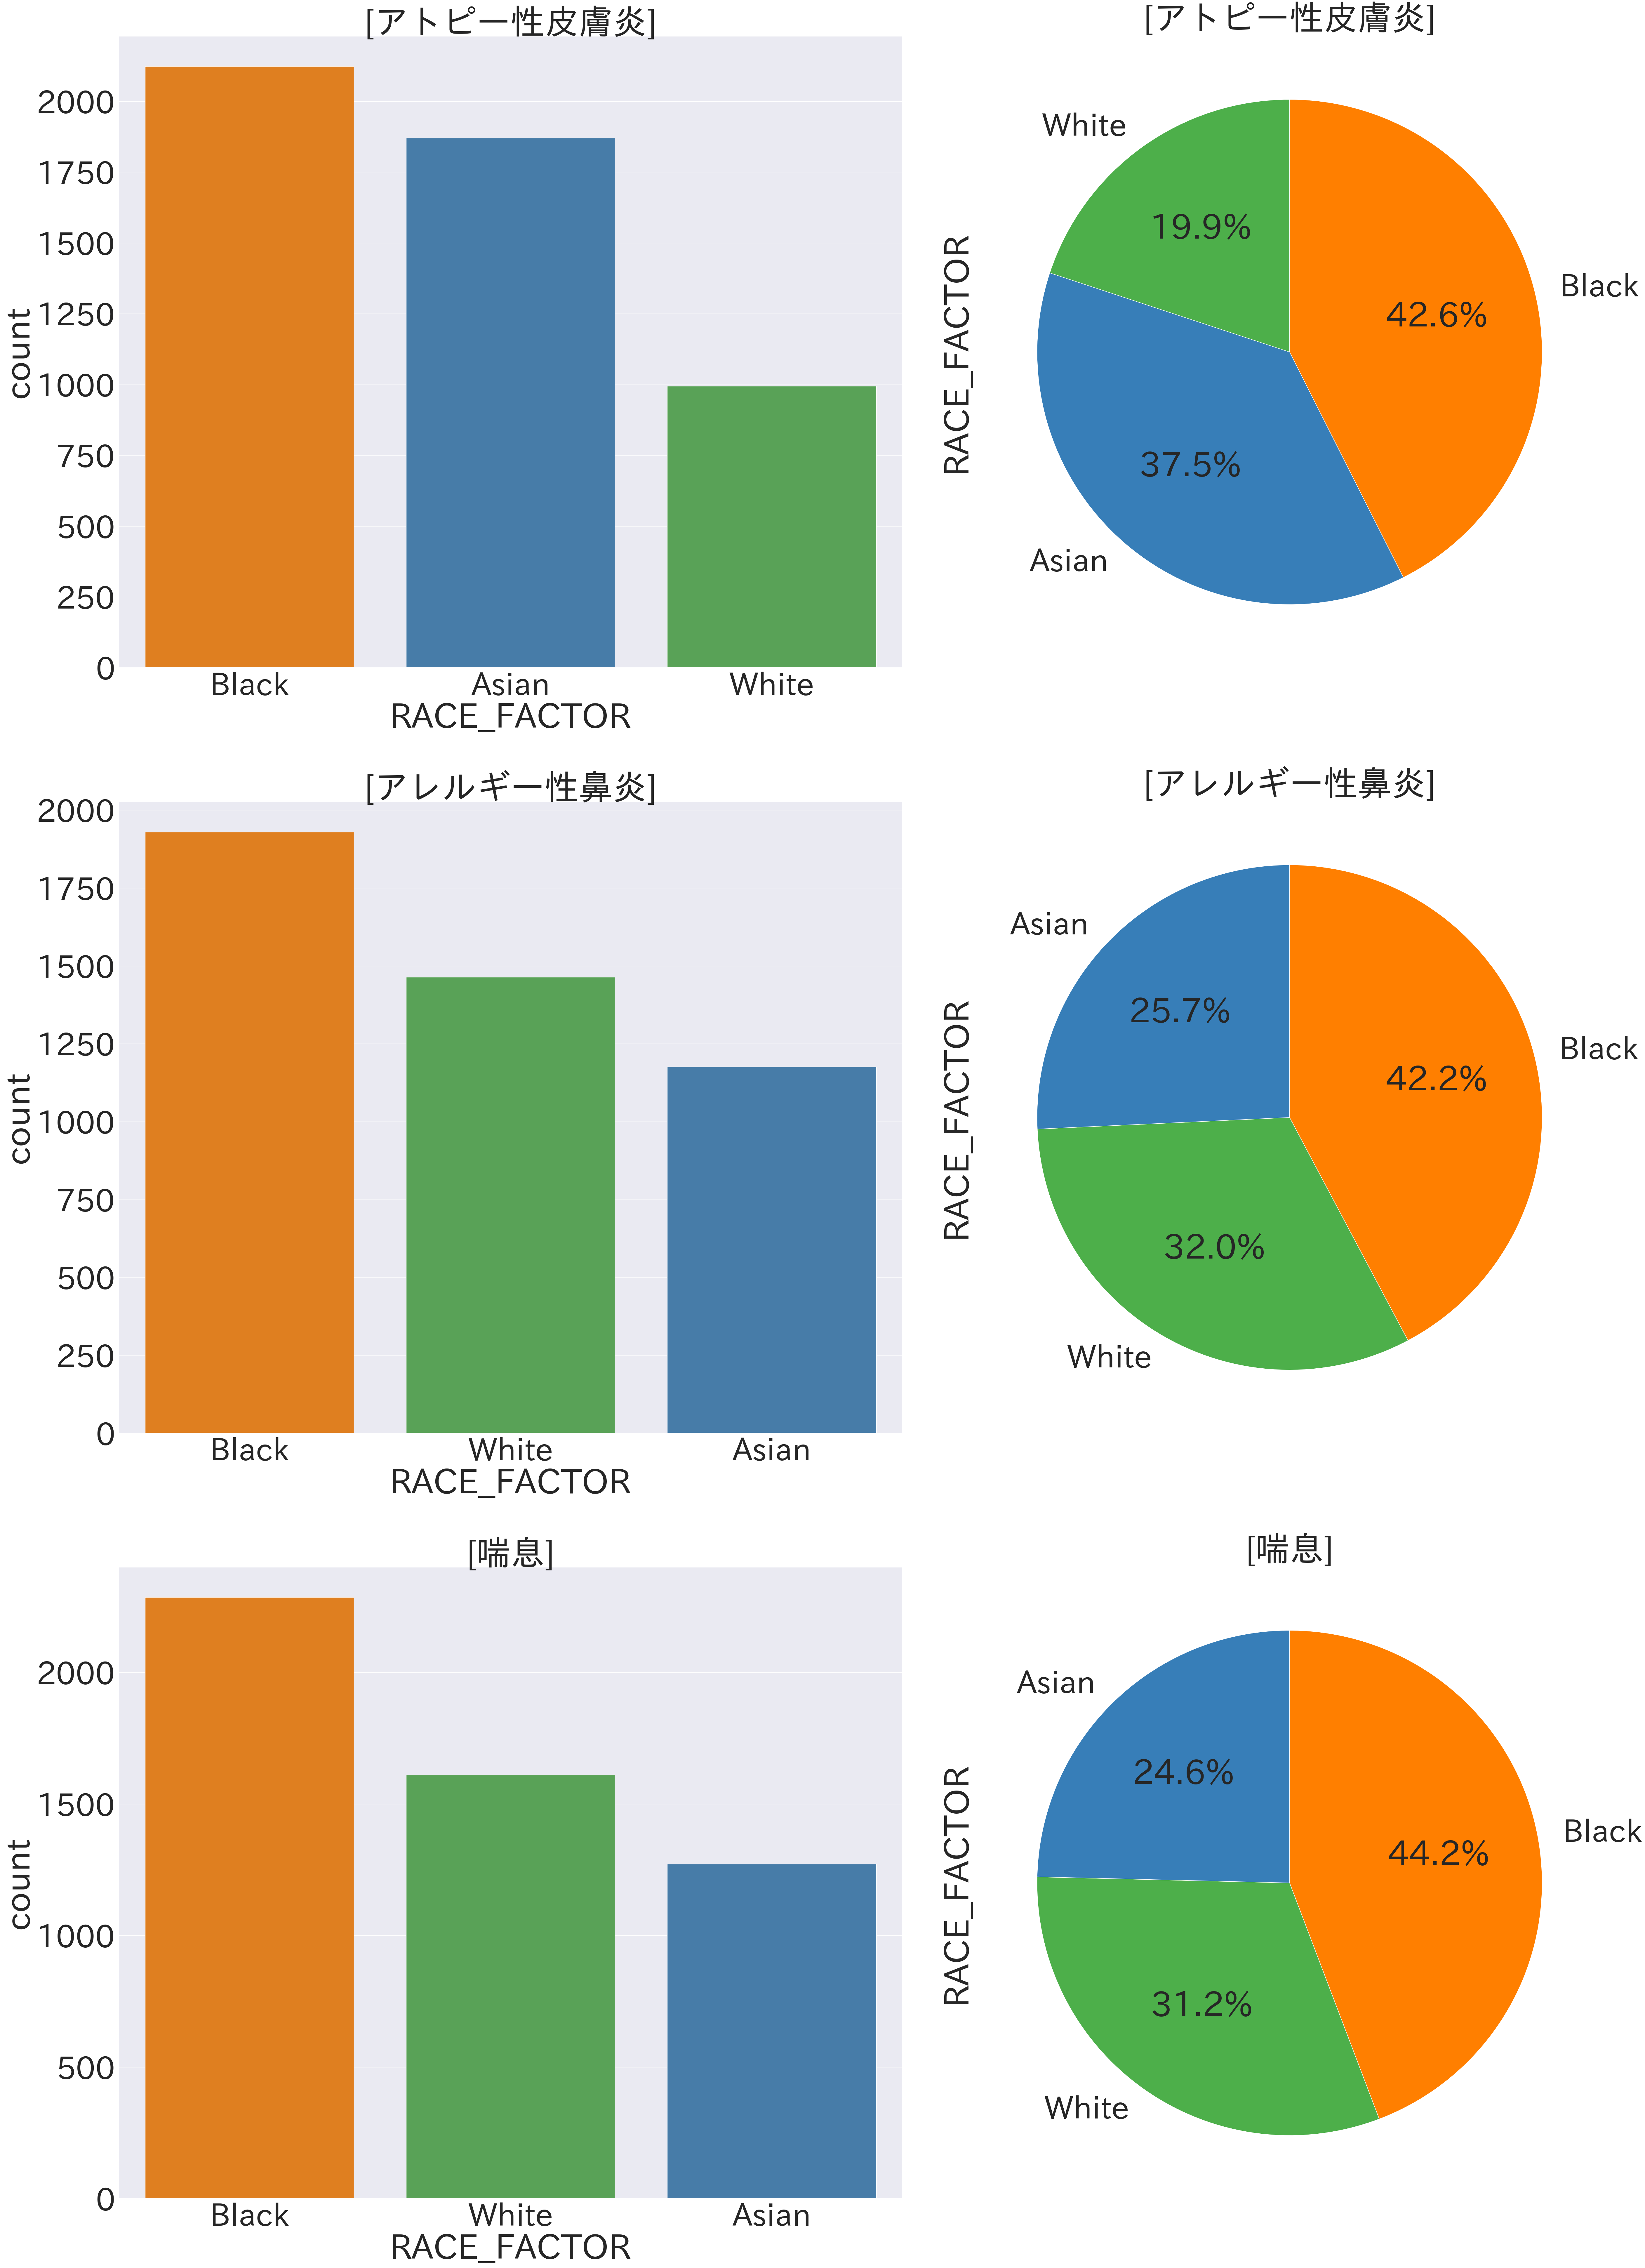

In [18]:
# 症状と人種の分布
sns.set(font_scale = 7, font='IPAexGothic')
fig, axs = plt.subplots(3,2, figsize=(60,80), tight_layout=True)

colors = ['#ff7f00', '#377eb8','#4daf4a']
sns.countplot(x=Atopic['RACE_FACTOR'], ax=axs[0,0], palette = colors,
              order=Atopic['RACE_FACTOR'].value_counts().index).set(title='[アトピー性皮膚炎]')
Atopic['RACE_FACTOR'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%', pctdistance=.6, colors = colors,
                                                    startangle = 90, radius=1, ax=axs[0,1]).set(title='[アトピー性皮膚炎]')

colors2 = ['#ff7f00','#4daf4a', '#377eb8']
sns.countplot(x=Rhinitis['RACE_FACTOR'], ax=axs[1,0], palette = colors2,
              order=Rhinitis['RACE_FACTOR'].value_counts().index).set(title='[アレルギー性鼻炎]')
Rhinitis['RACE_FACTOR'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%', pctdistance=.6, colors = colors2,
                                                    startangle = 90, radius=1, ax=axs[1,1]).set(title='[アレルギー性鼻炎]')
colors3 = ['#ff7f00','#4daf4a','#377eb8']
sns.countplot(x=Athma['RACE_FACTOR'], ax=axs[2,0], palette = colors3,
              order=Athma['RACE_FACTOR'].value_counts().index).set(title='[喘息]')
Athma['RACE_FACTOR'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%', pctdistance=.6, colors = colors3,
                                                    startangle = 90, radius=1, ax=axs[2,1]).set(title='[喘息]')
results_path = '../Graphs/race_diag.png'
# plt.savefig(results_path, bbox_inches='tight')
plt.show()